In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
df=pd.read_csv('/content/drive/MyDrive/FTS-Air Quality Index Prediction/Processed data/city_by_day_final(LI).csv')
df

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,0,Ahmedabad,1/1/2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,149.0,Moderate
1,1,Ahmedabad,1/2/2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,144.0,Moderate
2,2,Ahmedabad,1/3/2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,302.0,Very Poor
3,3,Ahmedabad,1/4/2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,144.0,Moderate
4,4,Ahmedabad,1/5/2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,330.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#AQI Trends
df['month']=pd.DatetimeIndex(df['Date']).month
df['year']=pd.DatetimeIndex(df['Date']).year

base=2015
df['months']= (df['year']-base)*12+ df['month']
df_AQI_trend= df.groupby(['City','months'])[['AQI']].mean().reset_index()
df_AQI_trend_groups=df_AQI_trend.groupby(df_AQI_trend.City)

def aqi_trend(city):
  fig = plt.figure(figsize = (8,3))
  sns.lineplot(
      data=df_AQI_trend_groups.get_group(city),
      x="months", y="AQI",color='green'
  )
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.title(city+" city AQI trend",fontweight="bold")
  plt.xlim([0,70])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

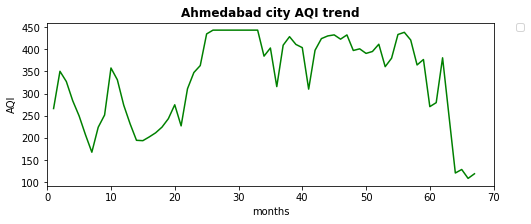

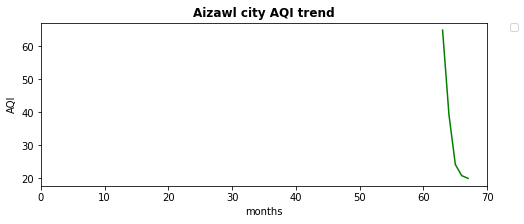

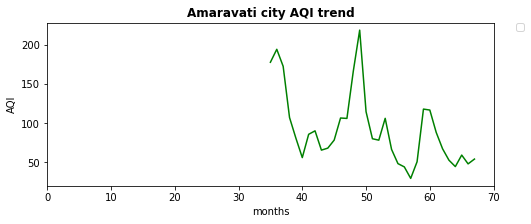

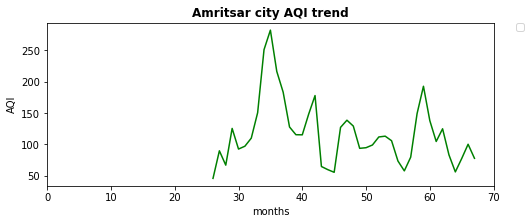

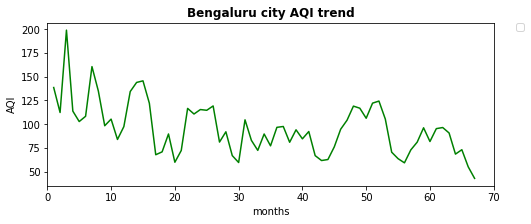

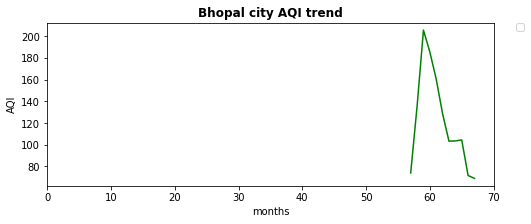

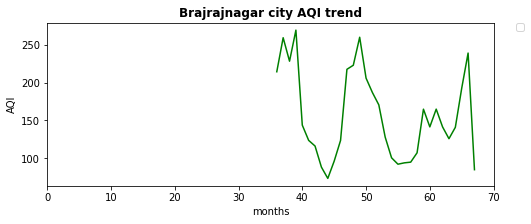

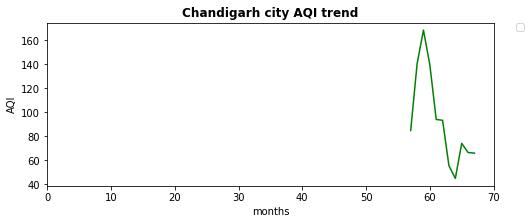

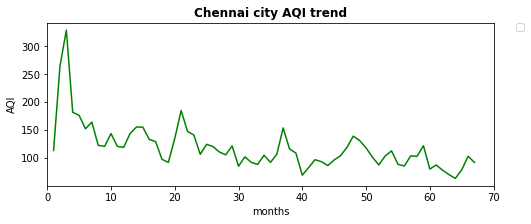

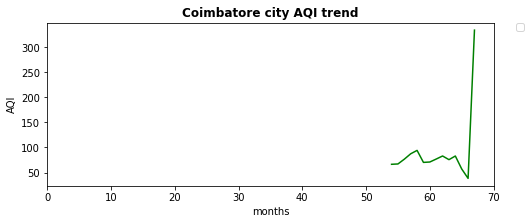

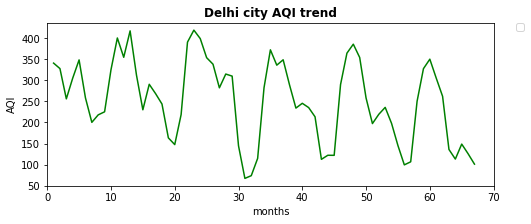

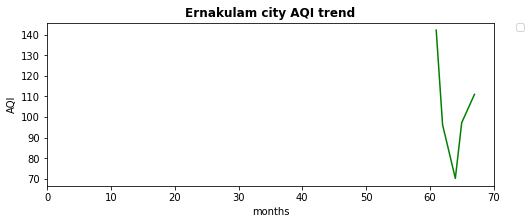

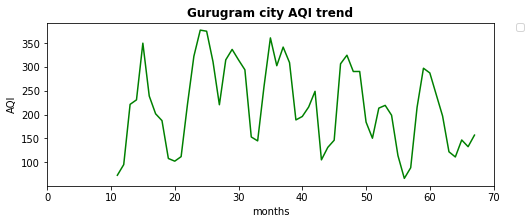

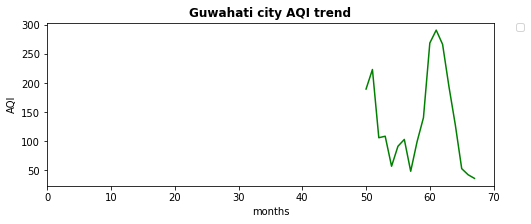

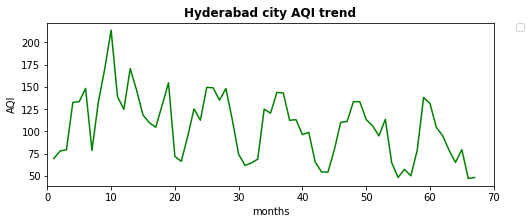

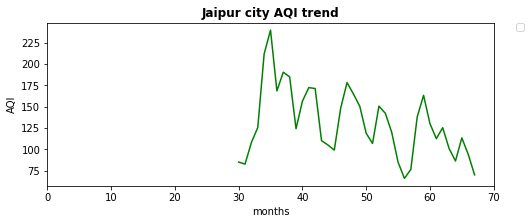

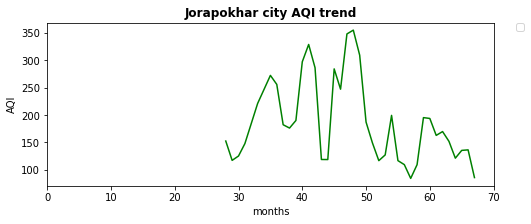

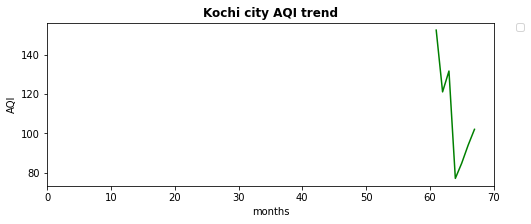

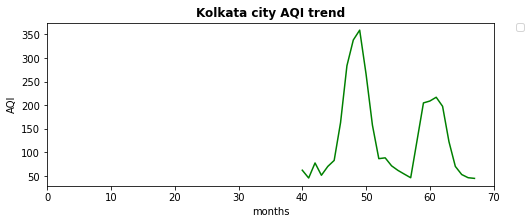

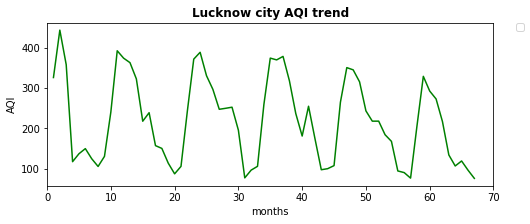

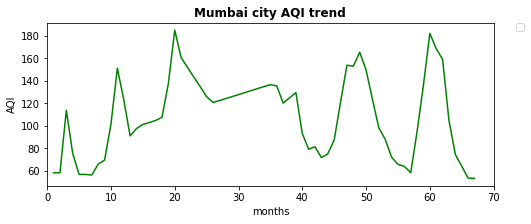

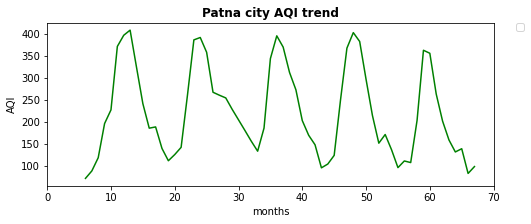

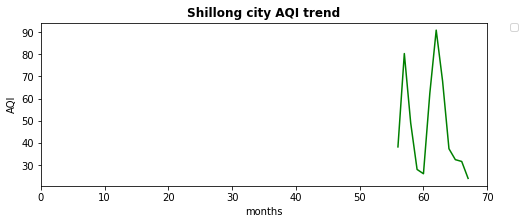

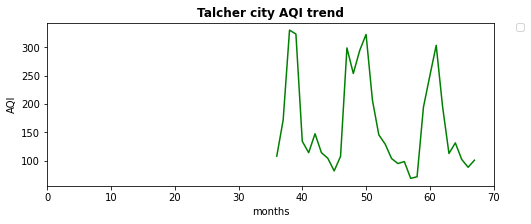

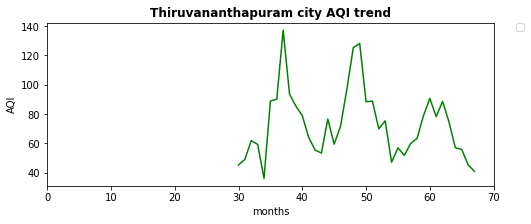

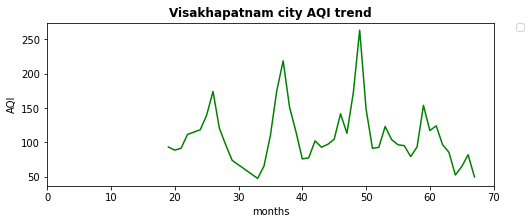

In [ ]:
for city in df.City.unique():
  aqi_trend(city)

In [ ]:
df_group=df.groupby(df.City)

In [ ]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
frames=[df_ahm,df_aiz,df_ama,df_amr,df_ben,df_bho,df_brj,df_cha,df_che,df_coi,df_del,df_ern,df_gur,df_guw,df_hyd,df_jai,df_jor,df_koc,df_kol,df_luc,df_mum,df_pat,df_shi,df_tal,df_thi,df_vis]

In [ ]:
city_len=[]
for df_city in frames:
  city_len.append(len(df_city))
np.array(city_len)

array([2009,  113,  951, 1221, 2009,  289,  938,  304, 2009,  386, 2009,
        162, 1679,  502, 2006, 1114, 1169,  162,  814, 2009, 2009, 1858,
        310,  925, 1112, 1462])

In [ ]:
#Citywise grouping
df_ahm=df_group.get_group("Ahmedabad").reset_index()['AQI']
df_aiz=df_group.get_group("Aizawl").reset_index()['AQI']
df_ama=df_group.get_group("Amaravati").reset_index()['AQI']
df_amr=df_group.get_group("Amritsar").reset_index()['AQI']
df_ben=df_group.get_group("Bengaluru").reset_index()['AQI']
df_bho=df_group.get_group("Bhopal").reset_index()['AQI']
df_brj=df_group.get_group("Brajrajnagar").reset_index()['AQI']
df_cha=df_group.get_group("Chandigarh").reset_index()['AQI']
df_che=df_group.get_group("Chennai").reset_index()['AQI']
df_coi=df_group.get_group("Coimbatore").reset_index()['AQI']
df_del=df_group.get_group("Delhi").reset_index()['AQI']
df_ern=df_group.get_group("Ernakulam").reset_index()['AQI']
df_gur=df_group.get_group("Gurugram").reset_index()['AQI']
df_guw=df_group.get_group("Guwahati").reset_index()['AQI']
df_hyd=df_group.get_group("Hyderabad").reset_index()['AQI']
df_jai=df_group.get_group("Jaipur").reset_index()['AQI']
df_jor=df_group.get_group("Jorapokhar").reset_index()['AQI']
df_koc=df_group.get_group("Kochi").reset_index()['AQI']
df_kol=df_group.get_group("Kolkata").reset_index()['AQI']
df_luc=df_group.get_group("Lucknow").reset_index()['AQI']
df_mum=df_group.get_group("Mumbai").reset_index()['AQI']
df_pat=df_group.get_group("Patna").reset_index()['AQI']
df_shi=df_group.get_group("Shillong").reset_index()['AQI']
df_tal=df_group.get_group("Talcher").reset_index()['AQI']
df_thi=df_group.get_group("Thiruvananthapuram").reset_index()['AQI']
df_vis=df_group.get_group("Visakhapatnam").reset_index()['AQI']

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_ahm=scaler.fit_transform(np.array(df_ahm).reshape(-1,1))
df_aiz=scaler.fit_transform(np.array(df_aiz).reshape(-1,1))
df_ama=scaler.fit_transform(np.array(df_ama).reshape(-1,1))
df_amr=scaler.fit_transform(np.array(df_amr).reshape(-1,1))
df_ben=scaler.fit_transform(np.array(df_ben).reshape(-1,1))
df_bho=scaler.fit_transform(np.array(df_bho).reshape(-1,1))
df_brj=scaler.fit_transform(np.array(df_brj).reshape(-1,1))
df_cha=scaler.fit_transform(np.array(df_cha).reshape(-1,1))
df_che=scaler.fit_transform(np.array(df_che).reshape(-1,1))
df_coi=scaler.fit_transform(np.array(df_coi).reshape(-1,1))
df_del=scaler.fit_transform(np.array(df_del).reshape(-1,1))
df_ern=scaler.fit_transform(np.array(df_ern).reshape(-1,1))
df_gur=scaler.fit_transform(np.array(df_gur).reshape(-1,1))
df_guw=scaler.fit_transform(np.array(df_guw).reshape(-1,1))
df_hyd=scaler.fit_transform(np.array(df_hyd).reshape(-1,1))
df_jai=scaler.fit_transform(np.array(df_jai).reshape(-1,1))
df_jor=scaler.fit_transform(np.array(df_jor).reshape(-1,1))
df_koc=scaler.fit_transform(np.array(df_koc).reshape(-1,1))
df_kol=scaler.fit_transform(np.array(df_kol).reshape(-1,1))
df_luc=scaler.fit_transform(np.array(df_luc).reshape(-1,1))
df_mum=scaler.fit_transform(np.array(df_mum).reshape(-1,1))
df_pat=scaler.fit_transform(np.array(df_pat).reshape(-1,1))
df_shi=scaler.fit_transform(np.array(df_shi).reshape(-1,1))
df_tal=scaler.fit_transform(np.array(df_tal).reshape(-1,1))
df_thi=scaler.fit_transform(np.array(df_thi).reshape(-1,1))
df_vis=scaler.fit_transform(np.array(df_vis).reshape(-1,1))

In [ ]:
#list of information of dataset
train_size=[]
test_size=[]
x_train_shape=[]
x_test_shape=[]

In [ ]:
##splitting dataset into train and test split
training_size_ahm=int(len(df_ahm)*0.80)
test_size_ahm=len(df_ahm)-training_size_ahm
train_data_ahm,test_data_ahm=df_ahm[0:training_size_ahm,:],df_ahm[training_size_ahm:len(df_ahm),:1]

In [ ]:
train_size.append(training_size_ahm)
test_size.append(test_size_ahm)

In [ ]:
training_size_ahm,test_size_ahm

(1607, 402)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train_ahm, y_train_ahm = create_dataset(train_data_ahm, time_step)
X_test_ahm, ytest_ahm = create_dataset(test_data_ahm, time_step)
x_train_shape.append(X_train_ahm.shape)
x_test_shape.append(X_test_ahm.shape)

In [ ]:
print(X_train_ahm.shape), print(y_train_ahm.shape)

(1506, 100)
(1506,)


(None, None)

In [ ]:
print(X_test_ahm.shape), print(ytest_ahm.shape)

(301, 100)
(301,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_ahm =X_train_ahm.reshape(X_train_ahm.shape[0],X_train_ahm.shape[1] , 1)
X_test_ahm = X_test_ahm.reshape(X_test_ahm.shape[0],X_test_ahm.shape[1] , 1)


In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_ahm,y_train_ahm,validation_data=(X_test_ahm,ytest_ahm),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 8s 176ms/step - loss: 0.1153 - val_loss: 0.0837
Epoch 2/100
24/24 [==============================] - 3s 127ms/step - loss: 0.0322 - val_loss: 0.0627
Epoch 3/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0280 - val_loss: 0.0553
Epoch 4/100
24/24 [==============================] - 3s 129ms/step - loss: 0.0269 - val_loss: 0.0541
Epoch 5/100
24/24 [==============================] - 3s 128ms/step - loss: 0.0271 - val_loss: 0.0528
Epoch 6/100
24/24 [==============================] - 3s 127ms/step - loss: 0.0268 - val_loss: 0.0536
Epoch 7/100
24/24 [==============================] - 3s 127ms/step - loss: 0.0266 - val_loss: 0.0541
Epoch 8/100
24/24 [==============================] - 3s 128ms/step - loss: 0.0270 - val_loss: 0.0537
Epoch 9/100
24/24 [==============================] - 3s 128ms/step - loss: 0.0266 - val_loss: 0.0524
Epoch 10/100
24/24 [==============================] - 3s 128ms/step - loss: 0.0268 - val_lo

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict_ahm=model.predict(X_train_ahm)
test_predict_ahm=model.predict(X_test_ahm)

In [ ]:
##Transformback to original form
train_predict_ahm=scaler.inverse_transform(train_predict_ahm)
test_predict_ahm=scaler.inverse_transform(test_predict_ahm)

In [ ]:
#Dictionary to store citywise train prediction and test prediction 
citywise_train_pre={'Ahmedabad': train_predict_ahm}
citywise_test_pre={'Ahmedabad': test_predict_ahm}

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse_train=[]
mse=math.sqrt(mean_squared_error(y_train_ahm,train_predict_ahm))
print(mse)
mse_train.append(mse)

305.7226750183531


In [ ]:
### Test Data RMSE
mse_test=[]
mse=math.sqrt(mean_squared_error(ytest_ahm,test_predict_ahm))
print(mse)
mse_test.append(mse)

252.1169569895414


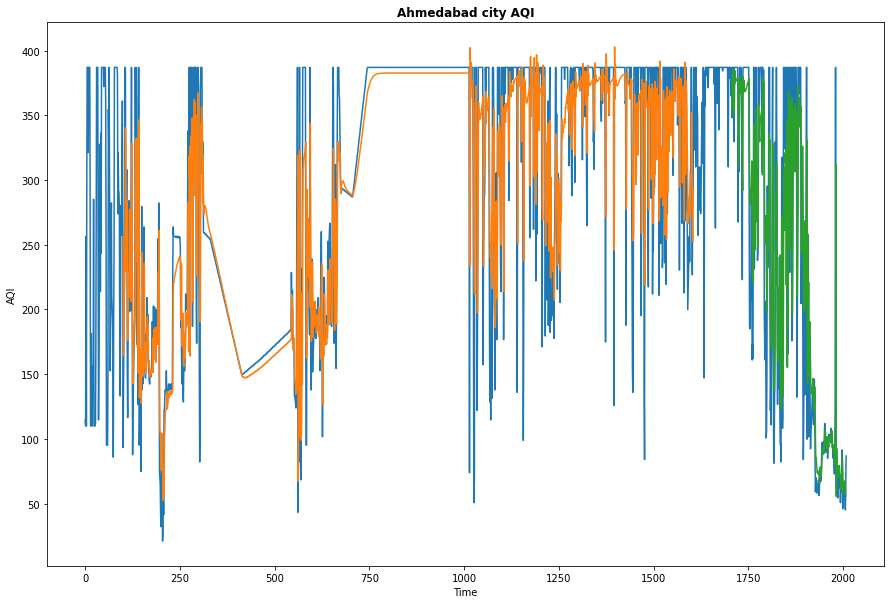

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot_ahm = numpy.empty_like(df_ahm)
trainPredictPlot_ahm[:, :] = np.nan
trainPredictPlot_ahm[look_back:len(train_predict_ahm)+look_back, :] = train_predict_ahm
# shift test predictions for plotting
testPredictPlot_ahm = numpy.empty_like(df_ahm)
testPredictPlot_ahm[:, :] = numpy.nan
testPredictPlot_ahm[len(train_predict_ahm)+(look_back*2)+1:len(df_ahm)-1, :] = test_predict_ahm
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.plot(scaler.inverse_transform(df_ahm))
plt.plot(trainPredictPlot_ahm)
plt.plot(testPredictPlot_ahm)
plt.xlabel("Time")
plt.ylabel("AQI")
plt.title("Ahmedabad city AQI",fontweight="bold")
plt.show()

In [ ]:
#stacked LSTM model function for other cities(samples<=200)
def lstm1(df1,city):
  ##splitting dataset into train and test split
  training_size=int(len(df1)*0.60)
  testing_size=len(df1)-training_size
  train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
  
  train_size.append(training_size)
  test_size.append(testing_size)
  
  import numpy
  # convert an array of values into a dataset matrix
  def create_dataset(dataset, time_step=1):
  	dataX, dataY = [], []
  	for i in range(len(dataset)-time_step-1):
  		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----40
  		dataX.append(a)
  		dataY.append(dataset[i + time_step, 0])
  	return numpy.array(dataX), numpy.array(dataY)
  
  # reshape into X=t,t+1,t+2,t+3 and Y=t+4
  time_step = 40
  X_train, y_train = create_dataset(train_data, time_step)
  X_test, ytest = create_dataset(test_data, time_step)
  
  x_train_shape.append(X_train.shape)
  x_test_shape.append(X_test.shape)
  
  # reshape input to be [samples, time steps, features] which is required for LSTM
  X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
  
  model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64)
  
  ### Do the prediction and check performance metrics
  train_predict=model.predict(X_train)
  test_predict=model.predict(X_test)
  ##Transformback to original form
  train_predict=scaler.inverse_transform(train_predict)
  test_predict=scaler.inverse_transform(test_predict)
  citywise_train_pre[city]=train_predict
  citywise_test_pre[city]=test_predict
  
  ### Calculate RMSE performance metrics
  mse_train.append(math.sqrt(mean_squared_error(y_train,train_predict)))
  ### Test Data RMSE
  mse_test.append(math.sqrt(mean_squared_error(ytest,test_predict)))




#stacked LSTM model function for other cities(samples>200)
def lstm2(df1,city):
  ##splitting dataset into train and test split
  training_size=int(len(df1)*0.65)
  testing_size=len(df1)-training_size
  train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
  
  train_size.append(training_size)
  test_size.append(testing_size)
  
  import numpy
  # convert an array of values into a dataset matrix
  def create_dataset(dataset, time_step=1):
  	dataX, dataY = [], []
  	for i in range(len(dataset)-time_step-1):
  		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
  		dataX.append(a)
  		dataY.append(dataset[i + time_step, 0])
  	return numpy.array(dataX), numpy.array(dataY)
  
  # reshape into X=t,t+1,t+2,t+3 and Y=t+4
  time_step = 100
  X_train, y_train = create_dataset(train_data, time_step)
  X_test, ytest = create_dataset(test_data, time_step)
  
  x_train_shape.append(X_train.shape)
  x_test_shape.append(X_test.shape)
  
  # reshape input to be [samples, time steps, features] which is required for LSTM
  X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
  
  model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64)
  
  ### Do the prediction and check performance metrics
  train_predict=model.predict(X_train)
  test_predict=model.predict(X_test)
  ##Transformback to original form
  train_predict=scaler.inverse_transform(train_predict)
  test_predict=scaler.inverse_transform(test_predict)
  citywise_train_pre[city]=train_predict
  citywise_test_pre[city]=test_predict
  
  ### Calculate RMSE performance metrics
  mse_train.append(math.sqrt(mean_squared_error(y_train,train_predict)))
  ### Test Data RMSE
  mse_test.append(math.sqrt(mean_squared_error(ytest,test_predict)))

In [ ]:
np.array(city_len)

array([2009,  113,  951, 1221, 2009,  289,  938,  304, 2009,  386, 2009,
        162, 1679,  502, 2006, 1114, 1169,  162,  814, 2009, 2009, 1858,
        310,  925, 1112, 1462])

In [ ]:
frames=[df_ahm,df_aiz,df_ama,df_amr,df_ben,df_bho,df_brj,df_cha,df_che,df_coi,df_del,df_ern,df_gur,df_guw,df_hyd,df_jai,df_jor,df_koc,df_kol,df_luc,df_mum,df_pat,df_shi,df_tal,df_thi,df_vis]

In [ ]:
lstm1(df_aiz,'Aizawl')

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.0089 - val_loss: 0.0014
Epoch 2/100
1/1 [==============================] - 0s 67ms/step - loss: 0.0088 - val_loss: 0.0019
Epoch 3/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0082 - val_loss: 0.0026
Epoch 4/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0074 - val_loss: 0.0035
Epoch 5/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0064 - val_loss: 0.0047
Epoch 6/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0054 - val_loss: 0.0063
Epoch 7/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0043 - val_loss: 0.0085
Epoch 8/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0035 - val_loss: 0.0115
Epoch 9/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0030 - val_loss: 0.0150
Epoch 10/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0028 - val_loss: 0.0171
Epoch 11/100
1/1 [===

In [ ]:
for (df_city,city) in zip(frames[2:11],df.City.unique()[2:11]):
  lstm2(df_city,city)

Epoch 1/100
9/9 [==============================] - 1s 149ms/step - loss: 0.0118 - val_loss: 0.0069
Epoch 2/100
9/9 [==============================] - 1s 139ms/step - loss: 0.0077 - val_loss: 0.0040
Epoch 3/100
9/9 [==============================] - 1s 139ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 4/100
9/9 [==============================] - 1s 139ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 5/100
9/9 [==============================] - 1s 138ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 6/100
9/9 [==============================] - 1s 136ms/step - loss: 0.0067 - val_loss: 0.0042
Epoch 7/100
9/9 [==============================] - 1s 139ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 8/100
9/9 [==============================] - 1s 140ms/step - loss: 0.0064 - val_loss: 0.0041
Epoch 9/100
9/9 [==============================] - 1s 138ms/step - loss: 0.0065 - val_loss: 0.0040
Epoch 10/100
9/9 [==============================] - 1s 135ms/step - loss: 0.0066 - val_loss: 0.0040
Epoch 11/

In [ ]:
lstm1(df_ern,'Ernakulam')

Epoch 1/100
1/1 [==============================] - 0s 117ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 2/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0038 - val_loss: 0.0086
Epoch 3/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0058 - val_loss: 0.0087
Epoch 4/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0039 - val_loss: 0.0073
Epoch 5/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0027 - val_loss: 0.0064
Epoch 6/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0034 - val_loss: 0.0059
Epoch 7/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0028 - val_loss: 0.0060
Epoch 8/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0027 - val_loss: 0.0068
Epoch 9/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0027 - val_loss: 0.0073
Epoch 10/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 11/100
1/1 [

In [ ]:
for (df_city,city) in zip(frames[12:17],df.City.unique()[12:17]):
  lstm2(df_city,city)

Epoch 1/100
16/16 [==============================] - 2s 141ms/step - loss: 0.0315 - val_loss: 0.0153
Epoch 2/100
16/16 [==============================] - 2s 143ms/step - loss: 0.0231 - val_loss: 0.0129
Epoch 3/100
16/16 [==============================] - 2s 142ms/step - loss: 0.0217 - val_loss: 0.0129
Epoch 4/100
16/16 [==============================] - 2s 142ms/step - loss: 0.0206 - val_loss: 0.0129
Epoch 5/100
16/16 [==============================] - 2s 139ms/step - loss: 0.0199 - val_loss: 0.0134
Epoch 6/100
16/16 [==============================] - 2s 138ms/step - loss: 0.0192 - val_loss: 0.0152
Epoch 7/100
16/16 [==============================] - 2s 140ms/step - loss: 0.0190 - val_loss: 0.0146
Epoch 8/100
16/16 [==============================] - 2s 140ms/step - loss: 0.0179 - val_loss: 0.0145
Epoch 9/100
16/16 [==============================] - 2s 141ms/step - loss: 0.0174 - val_loss: 0.0152
Epoch 10/100
16/16 [==============================] - 2s 142ms/step - loss: 0.0171 - val_lo

In [ ]:
lstm1(df_koc,'Kochi')

Epoch 1/100
1/1 [==============================] - 0s 101ms/step - loss: 0.0263 - val_loss: 0.0411
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0225 - val_loss: 0.0338
Epoch 3/100
1/1 [==============================] - 0s 83ms/step - loss: 0.0187 - val_loss: 0.0289
Epoch 4/100
1/1 [==============================] - 0s 76ms/step - loss: 0.0154 - val_loss: 0.0268
Epoch 5/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0127 - val_loss: 0.0330
Epoch 6/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0112 - val_loss: 0.0462
Epoch 7/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0097 - val_loss: 0.0557
Epoch 8/100
1/1 [==============================] - 0s 85ms/step - loss: 0.0091 - val_loss: 0.0590
Epoch 9/100
1/1 [==============================] - 0s 92ms/step - loss: 0.0078 - val_loss: 0.0575
Epoch 10/100
1/1 [==============================] - 0s 87ms/step - loss: 0.0061 - val_loss: 0.0511
Epoch 11/100
1/1 [

In [ ]:
for (df_city,city) in zip(frames[18:],df.City.unique()[18:]):
  lstm2(df_city,city)

Epoch 1/100
7/7 [==============================] - 1s 150ms/step - loss: 0.0203 - val_loss: 0.0213
Epoch 2/100
7/7 [==============================] - 1s 143ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 3/100
7/7 [==============================] - 1s 147ms/step - loss: 0.0089 - val_loss: 0.0098
Epoch 4/100
7/7 [==============================] - 1s 145ms/step - loss: 0.0057 - val_loss: 0.0101
Epoch 5/100
7/7 [==============================] - 1s 144ms/step - loss: 0.0068 - val_loss: 0.0085
Epoch 6/100
7/7 [==============================] - 1s 145ms/step - loss: 0.0049 - val_loss: 0.0081
Epoch 7/100
7/7 [==============================] - 1s 143ms/step - loss: 0.0042 - val_loss: 0.0078
Epoch 8/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0035 - val_loss: 0.0070
Epoch 9/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0031 - val_loss: 0.0071
Epoch 10/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0029 - val_loss: 0.0070
Epoch 11/

In [ ]:
len(test_size)

26

In [ ]:
train_size.remove(67) #by mistake train_size of Aizwal city was repeated so i removed it

#Tabular citywise representation
lstm_desc=pd.DataFrame(index=df.City.unique())
lstm_desc['train_size']=pd.Series(train_size).values
lstm_desc['test_size']=pd.Series(test_size).values
lstm_desc['x_train_shape']=pd.Series(x_train_shape).values
lstm_desc['x_test_shape']=pd.Series(x_test_shape).values
lstm_desc['mse_train']=pd.Series(mse_train).values
lstm_desc['mse_test']=pd.Series(mse_test).values
lstm_desc

,train_size,test_size,x_train_shape,x_test_shape,mse_train,mse_test
Ahmedabad,1607,402,"(1506, 100)","(301, 100)",305.722675,252.116957
Aizawl,67,46,"(26, 40)","(5, 40)",59.823204,77.922360
Amaravati,618,333,"(517, 100)","(232, 100)",121.624415,88.382446
Amritsar,793,428,"(692, 100)","(327, 100)",126.222038,104.230309
Bengaluru,1305,704,"(1204, 100)","(603, 100)",95.921407,89.680223
Bhopal,187,102,"(86, 100)","(1, 100)",163.632905,82.069139
Brajrajnagar,609,329,"(508, 100)","(228, 100)",142.263392,151.392405
Chandigarh,197,107,"(96, 100)","(6, 100)",112.982107,74.301658
Chennai,1305,704,"(1204, 100)","(603, 100)",112.203913,90.718707
Coimbatore,250,136,"(149, 100)","(35, 100)",87.087173,79.660355


<function matplotlib.pyplot.show>

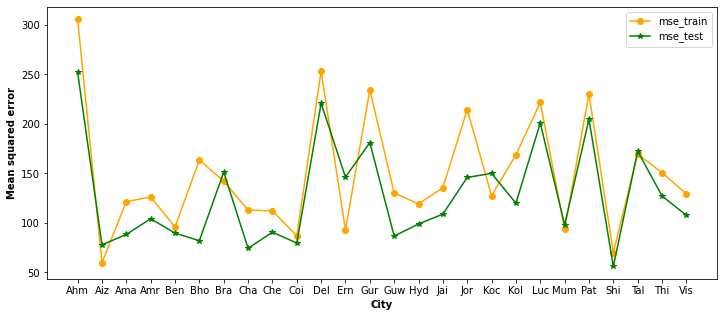

In [19]:
cities=df.City.unique()
x=[]
for i in range(0,26):
  x.append(cities[i][:3])
y1=[305.72,59.82,121.62,126.22,95.92,163.63,142.26,112.98,112.20,87.08,253.33,92.74,234.41,130.31,119.18,135.60,214.52,127.49,168.87,221.75,93.78,230.31,70.06,169.63,150.76,129.33]
y2=[252.11,77.92,88.38,104.23,89.68,82.06,151.39,74.30,90.7,79.66,220.98,146.26,181.28,86.74,98.99,108.88,145.97,150.09,119.95,200.96,98.04,204.81,56.04,172.49,127.27,107.73]
plt.figure(figsize=(12,5))
plt.plot(x,y1,color='orange',marker='o',label='mse_train')
plt.plot(x,y2,color='green',marker='*',label='mse_test')
plt.xlabel("City",fontweight="bold")
plt.ylabel("Mean squared error",fontweight="bold")
plt.legend()
plt.show

In [ ]:
len(citywise_train_pre),len(citywise_test_pre)

(26, 26)

In [ ]:
def plotting(df1,train_predict,test_predict,city,look_back):
  ### Plotting 
  # shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(df1)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
  # shift test predictions for plotting
  testPredictPlot = numpy.empty_like(df1)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
  # plot baseline and predictions
  fig = plt.figure(figsize = (10,5))
  plt.plot(scaler.inverse_transform(df1))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.title(city + " city AQI",fontweight="bold")
  plt.show()

In [ ]:
lookback=[]
lookback.append(100)
lookback.append(40)
for i in range(2,11):
  lookback.append(100)
lookback.append(40)
for i in range(12,17):
  lookback.append(100)
lookback.append(40)
for i in range(18,26):
  lookback.append(100)

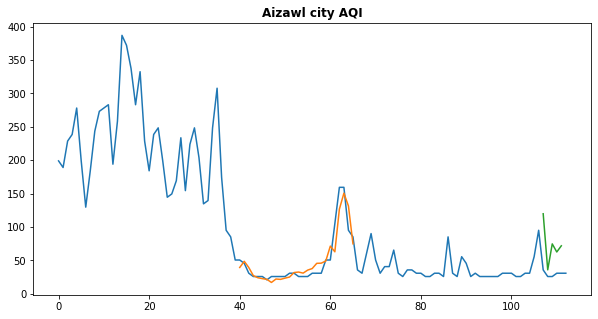

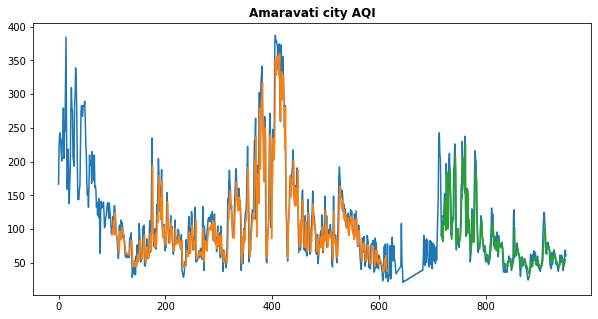

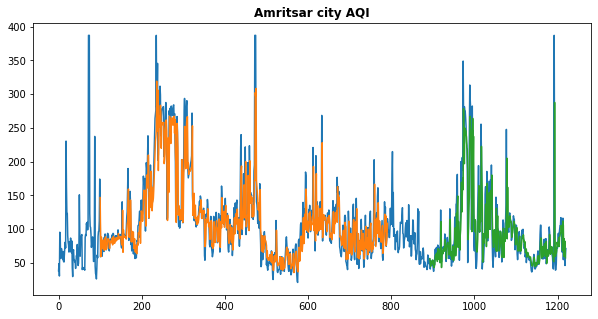

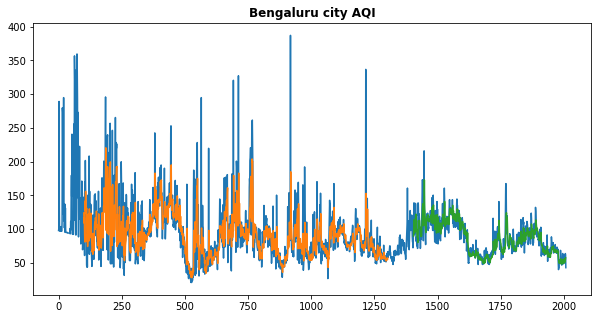

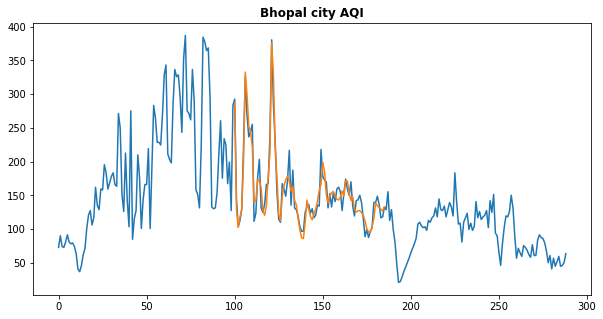

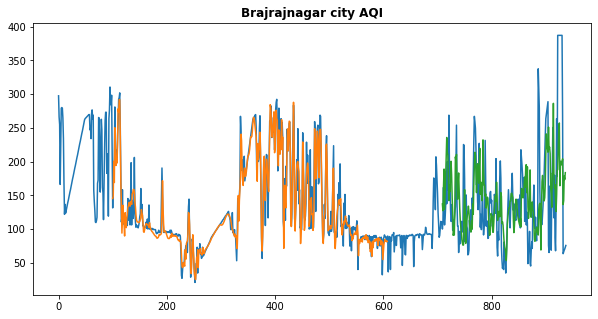

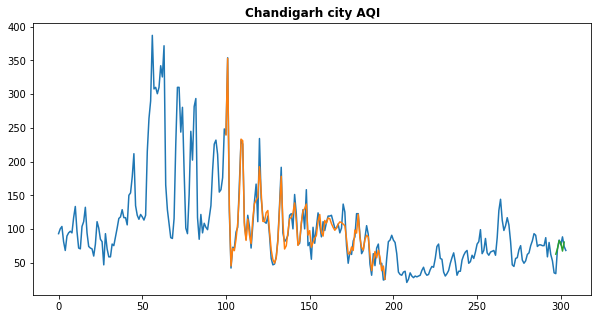

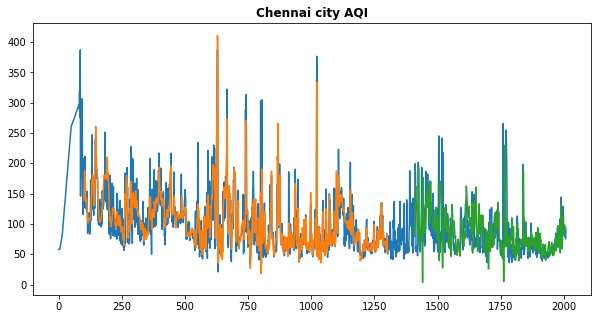

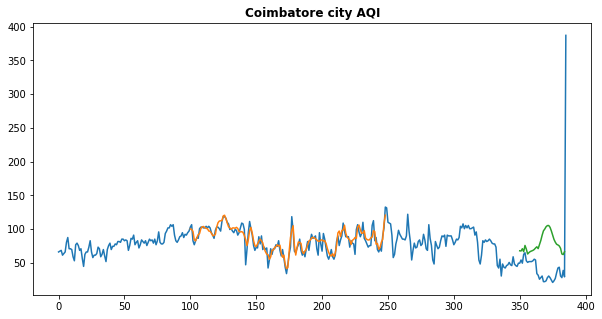

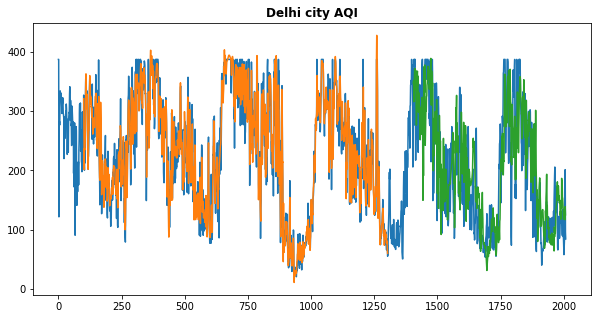

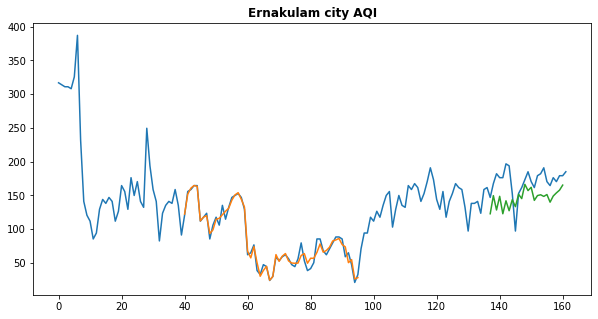

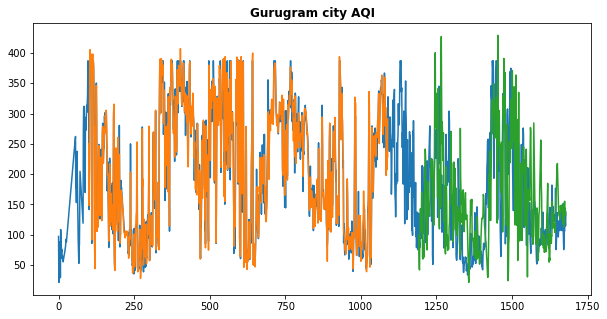

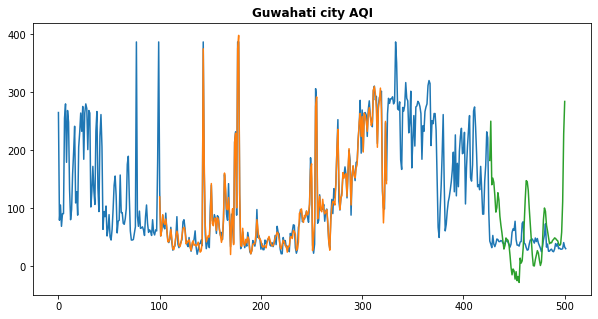

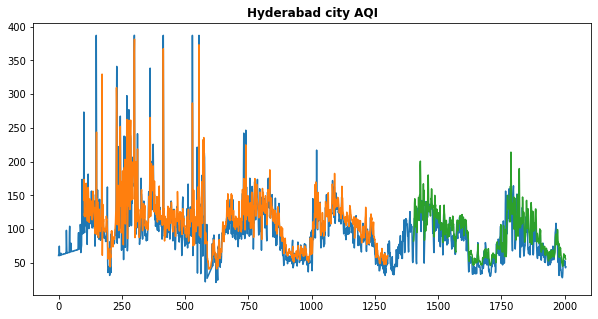

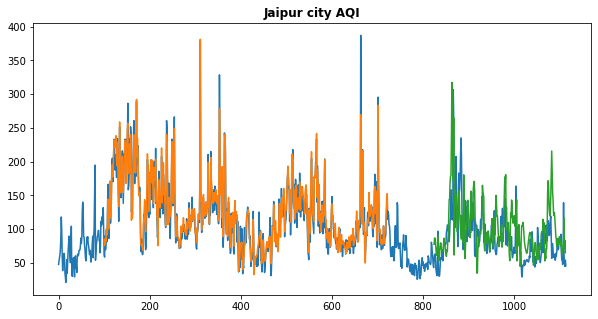

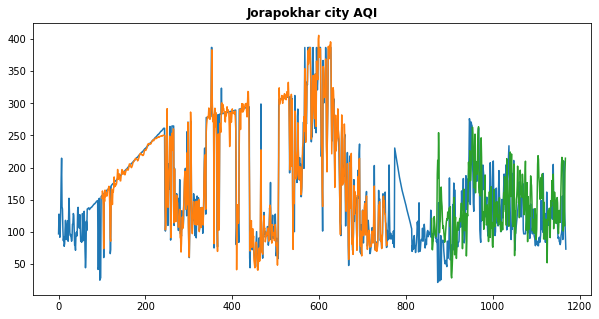

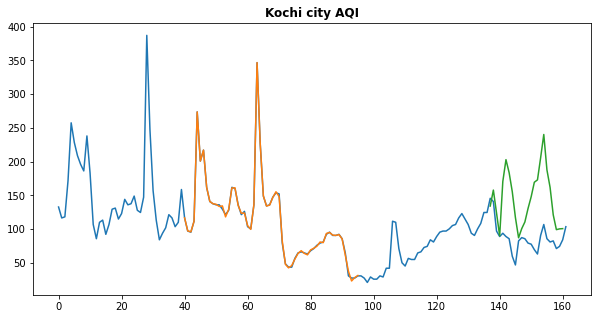

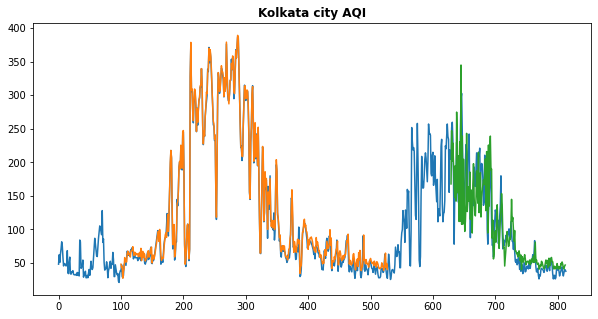

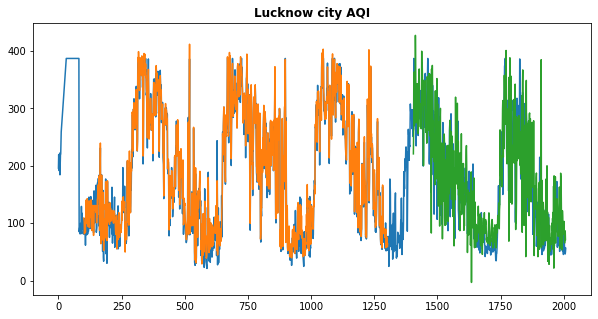

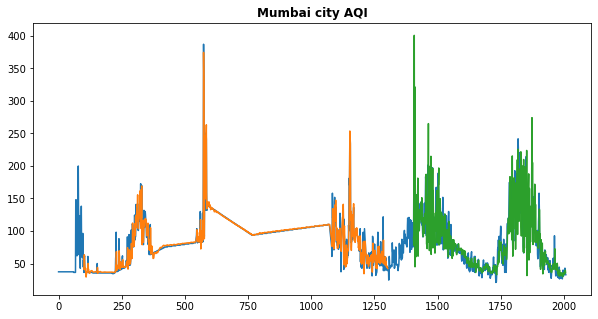

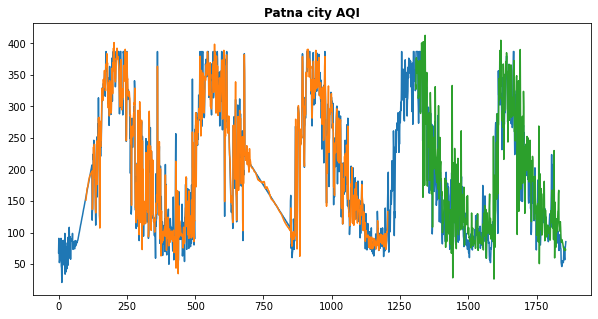

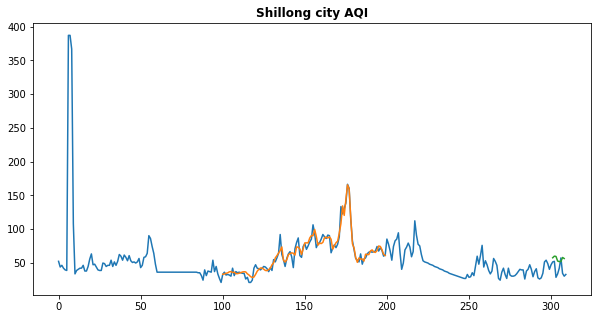

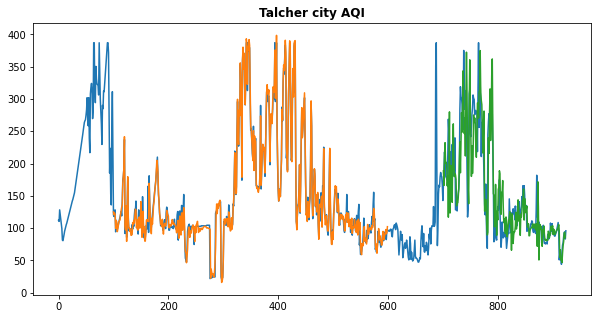

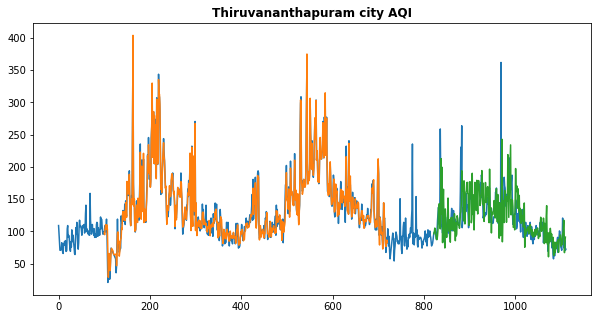

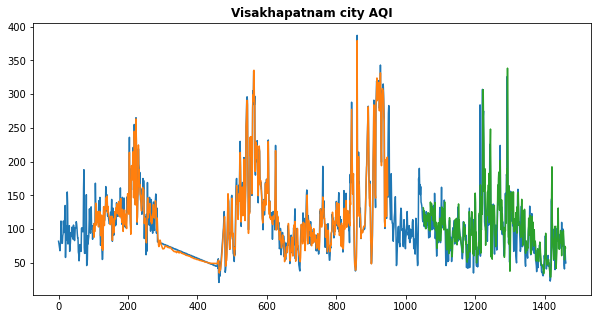

In [ ]:
for (df_city,city,look_back) in zip(frames[1:],df.City.unique()[1:],lookback[1:]):
  plotting(df_city,citywise_train_pre[city],citywise_test_pre[city],city,look_back)

In [ ]:
def pred(test_data,city,look_back):  
  input_start=len(test_data)-look_back
  x_input=test_data[input_start:].reshape(1,-1)
  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()
  
  # demonstrate prediction for next 10 days
  
  lst_output=[]
  n_steps=look_back
  i=0
  while(i<10):
      
      if(len(temp_input)>look_back):
          #print(temp_input)
          x_input=np.array(temp_input[1:])
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          #print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          lst_output.append(yhat[0])
          #print(temp_input)
          #lst_output.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          #print(yhat[0])
          temp_input.extend(yhat[0].tolist())
          lst_output.append(yhat[0])
          #print(len(temp_input))
          #lst_output.extend(yhat.tolist())
          i=i+1
  lst_output=scaler.inverse_transform(lst_output)
  return lst_output

In [ ]:
#10 days prediction making
i=0
prediction=pd.DataFrame(index=range(1,11))
for (df_city,city) in zip(frames,df.City.unique()):
  test_data=df_city[-test_size[i]:]
  prediction[city]=pred(test_data,city,lookback[i])
  i=i+1
prediction

,Ahmedabad,Aizawl,Amaravati,Amritsar,Bengaluru,Bhopal,Brajrajnagar,Chandigarh,Chennai,Coimbatore,Delhi,Ernakulam,Gurugram,Guwahati,Hyderabad,Jaipur,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
1,70.123240,64.013652,68.322616,81.429221,48.413392,77.869253,106.172750,58.715458,70.954943,316.388281,94.516754,145.209457,119.554599,40.186241,45.538351,52.833641,76.244400,92.281580,40.699032,60.118212,40.262300,79.566325,36.647628,87.372516,77.683447,60.995034
2,76.509980,83.110570,69.822576,91.974366,49.608170,94.541132,150.988777,51.886573,62.706051,113.288274,92.089464,118.135361,107.474109,41.427438,43.392398,64.032204,97.197407,82.698173,44.829013,58.599188,39.063738,77.312008,34.225539,79.973715,86.037567,61.000332
3,82.083903,110.624719,63.699823,100.398660,51.955368,106.474101,163.668844,63.349417,65.848543,162.648695,116.681884,131.195974,122.920242,43.756685,40.811991,71.896513,111.214986,83.256372,49.965027,57.394683,38.848604,75.897777,33.494068,73.840916,99.095736,59.413356
4,87.753498,142.646170,51.198023,97.775534,52.931175,110.757792,217.260430,67.869343,72.816230,204.136302,126.226405,128.315362,118.052212,45.303610,38.407775,83.019916,118.275077,80.837983,54.542461,54.699689,39.208301,69.673327,34.843529,71.913272,113.096343,61.603547
5,89.748349,167.208617,44.922443,91.436859,53.631178,108.576153,215.890167,68.973797,75.563288,162.481361,105.872626,133.448382,108.518495,46.959094,37.008498,101.133580,136.770470,72.403942,57.269076,49.448024,40.831076,58.666152,38.231172,65.624440,114.298453,69.618865
6,87.289421,163.832023,46.847226,94.312050,52.791172,97.037064,217.208335,75.403317,75.590530,95.629629,125.466949,130.351820,109.088229,48.345558,36.869412,131.062202,150.052148,74.162572,57.408053,43.787106,43.369009,52.935229,43.215076,59.449984,95.762593,79.326477
7,80.128942,143.238521,50.319103,92.001035,49.651806,83.364429,168.053665,87.187277,77.214330,73.669748,127.983758,125.733063,105.773110,50.723480,37.904576,134.807170,158.310897,84.084754,55.925690,41.695422,46.379402,54.389705,49.114479,57.671088,76.973446,83.788704
8,74.799153,97.060990,53.556363,86.650293,45.450310,76.198479,144.686490,97.888505,78.346964,132.165206,128.766993,120.006863,104.938719,53.445939,39.834062,100.330160,154.499219,90.092764,55.652565,44.652448,49.394939,58.141857,54.812777,59.741791,67.213695,82.870667
9,74.169013,84.589472,58.455927,80.576853,42.919348,73.540181,186.055574,92.160401,75.276259,104.838548,110.260310,116.534413,114.614753,55.623090,42.419478,83.516781,115.100340,95.083128,58.266826,50.720824,51.792680,61.944106,59.116145,63.626616,69.579859,82.323212
10,74.895408,89.745262,64.379086,78.292513,43.119738,71.256921,220.360864,70.875846,70.464104,89.612625,106.510708,121.839893,116.669929,56.306590,45.275414,68.628679,78.034291,108.986090,62.824904,58.356670,53.099349,66.453745,61.344319,68.281156,69.817875,77.316917
